#### Izzy May
#### Fall 2023


---



#Introduction
### Project Domain:

This project explores the domain of biodiversity within national parks. This area is significant due to the critical role biodiversity plays in maintaining ecological balance and the health of our planet. Understanding how different factors, like the size of national parks and the presence of different species, influence biodiversity can aid in effective conservation strategies. This domain is of particular interest to me as I am an avid outdoor enthusiast who frequently uses our National Parks for recreation. I am passionate about environmental conservation and am interested in exploring relationships between species in natural habitats.

### Objective
The primary objective is to classify the biodiversity of species in relation to the size of the national parks and the interdependence of species. This involves analyzing patterns and correlations between the park's size and the variety of species found within.

### Potential Impacts of the Results
Understanding these correlations can significantly impact conservation strategies, funding allocations, and ecological research priorities. It could lead to more informed decisions about park expansions and species protection measures.

### Stakeholders
Key stakeholders include environmental researchers, conservationists, policy makers, and the broader public interested in environmental preservation. The insights gained could inform policy decisions and conservation strategies, benefiting the ecological health of these parks.

### Hypothesis
######"It is hypothesized that there is a positive correlation between the biodiversity of species and the size of national parks (measured in acres), with larger parks potentially supporting a greater variety of species due to more extensive habitats and resources. Furthermore, it is also posited that the presence of different species positively affects the presence of others, suggesting an interdependent relationship among various species groups. This interdependence could be due to various ecological factors where certain species might create a more hospitable environment for others, thus enhancing overall biodiversity.
---



#Dataset Information
The dataset is in two different files in CSV format, making it convenient for analysis using common data science tools. There are two different tables, the Species table and the Park Information table. Here's what is included in each table.

1. Species Table: Contains species-specific information. The species data was collected from the NPSpecies database.
  - Attributes: There are 8 attribute in this dataset - Species ID,	Park Name,	Category, Order, Family,	Scientific Name,	Common Names,	Record Status.

  - Instances: There are 119,249 instances in this database, each representing the information for a single species.

2. Park Information Table: Details about each national park. This dataset was collected from the National Park Service database.
  - Attributes: There are 6 attribute in this dataset - Park Code,	Park Name,	State,	Acres,	Latitude,	Longitude.

  - Instances: There are 57 instances in this database, each representing the information of a different national park.


---


#Dataset Cleaning
The original species dataset contained an attribute for conservation status, but due to many missing values, this attribute was omitted in the final dataset. Furthermore, several parks in the dataset had missing values for categories such as Insect, Fungi, Nonvascular Plant, Crab/Lobster/Shrimp, Invertebrate, Algae, Slug/Snail, and Spider/Scorpion. This absence of data presents a challenge in accurately representing the biodiversity of these parks.

For categories like insects, which are ubiquitous in most environments, it's reasonable to assume that their absence in the dataset is more likely due to a lack of comprehensive counting rather than their actual absence in the parks. Insects, being highly adaptable, are found in a wide range of climates and terrains, making it unusual for a park to completely lack insect species unless it has a particularly extreme environment.

On the other hand, some species may indeed be absent in certain parks due to specific environmental conditions. For example, parks located in arid or colder climates might naturally have fewer species of Fungi, Algae, or Nonvascular Plants, which tend to thrive in moist, humid conditions. Similarly, species like Crab/Lobster/Shrimp are typically found in aquatic environments, so their absence in parks without such habitats would be expected.

The missing data on certain categories can lead to an underestimation of the biodiversity in these parks. While it might be accurate for some parks that lack certain species due to their geographical location or climate conditions, in many cases, these species are likely present but were simply not recorded. Because of this, these species were not used to investigate the relationship between biodiversity and park size.

### Dataset Merging
I merged these tables based on park code. Each park has a 4 digit code to abreviate the park name. Both datasets contained this attribute, so that is how I merged them. I also created a new dataset called SpeciesCounts.csv which contains simply the counts of each species category per park for easier visualization.

### Data Preparation Challenges
Some challenges I faced in preparing the the data included handling a large dataset, missing data, and dealing with outliers. To handle the large species dataset with over 119,249 instances, I created a simple program to count each instance of each category per park in order to create a new dataset with only these counts. This new dataset also contains the park code so that is can be merged with the two original datasets. The missing data presented a challenge, but finding a solution did not prove difficult as I went forward with simply removing these instances. To deal with the outliers, I filtered the data to only use parks with less than 1.5 million acres to not include exceptionally large parks that might skew the overall analysis. This decision was based on the observation that the majority of the parks have a significantly smaller area, and including very large parks could disproportionately affect the results.


---


#Data Exploration

### Data Aggregation Techniques
In my analysis of species counts and park details, I applied various data aggregation techniques to effectively manage and interpret the dataset. I grouped the data by park name to summarize species counts, used filters to exclude parks over 1.5 million acres to manage outliers, and merged different data sources for a comprehensive view. Additionally, I categorized parks based on vascular plant counts for comparative analysis and addressed missing data by excluding certain attributes. These methods allowed me to transform raw data into a structured format, facilitating a more nuanced and accurate analysis.

### Visualizations and Hypothesis Tests
There are five main types of charts to informatively present the attributes and relationships:
  1. Species per category top 10 National Parks. Test if there is any general correlation between number of organisms in each species category across parks.
  2. Correlation Coefficient of species and park size relationship. Test if different species categories have a higher correlation to park size.
  3. Relationships between vascular plant, insect, fish, bird, and mammal species and park size. Test initial hypothesis to gauge if theres a correlation between certain number of organisms in species based on park size.
  4. Relationship between vascular plant species count and insect, fish, bird, and mammal species count. Test is there is a correltion between the amount of plant species and other identified species.


---

# Models

# Model 1:
This code analyzes species diversity in national parks by grouping and counting unique species within each park and category and printing them as a graph. The top 10 parks with the most species are identified, and their data is rearranged into a pivot table for clearer presentation. Park sizes are also included for context. A stacked bar chart is generated, showing the number of species across different categories in these top parks.

<ipython-input-11-117544b58622>:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species_data = pd.read_csv('species.csv')


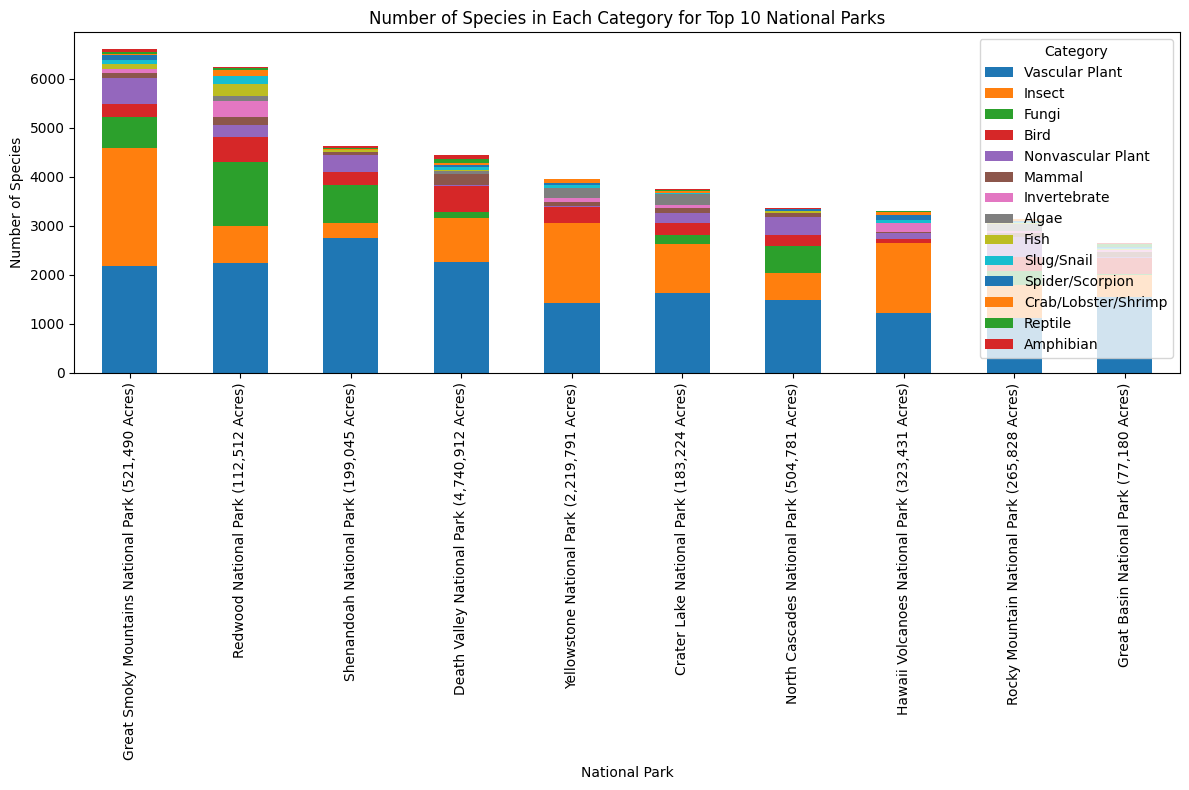

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files into DataFrames
parks_data = pd.read_csv('parks.csv')
species_data = pd.read_csv('species.csv')

# Group species data by 'Park Name' and 'Category' and count unique 'Scientific Name' values
grouped_data = species_data.groupby(['Park Name', 'Category'])['Scientific Name'].nunique()

# Sort parks by total number of species in descending order, and pick the top 10 parks
top_parks = grouped_data.groupby(level=0).sum().sort_values(ascending=False).head(10)

# Select data for the top 10 parks
top_data = grouped_data[top_parks.index.get_level_values('Park Name')]

# Pivot the data for a nice table with categories as columns and parks as rows
pivot_data = top_data.unstack().fillna(0)

# Sort categories within each park by the number of species
pivot_data = pivot_data[pivot_data.sum().sort_values(ascending=False).index]

# Create a mapping of park names to acres
park_acres_mapping = parks_data.set_index('Park Name')['Acres'].to_dict()

# Update the index of pivot_data to include acres
pivot_data.index = [f"{park} ({park_acres_mapping[park]:,} Acres)" for park in pivot_data.index]

# Create a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding titles and labels
plt.title('Number of Species in Each Category for Top 10 National Parks')
plt.xlabel('National Park')
plt.ylabel('Number of Species')
plt.legend(title='Category', loc='upper right')

plt.tight_layout()
plt.show()


From the chart, we observe varying species distributions across parks, allowing for a comparison of biodiversity. The inclusion of park sizes adds context, indicating potential relationships between park size and biodiversity. This graph doesn't show a direct correlation between park size and biodiversity, but does show that the larger parks tend to have higher biodiversity, serving as a starting point for my research.


#Model 2:
This code analyzes the correlation between the number of vascular plant species and various animal species (Mammals, Birds, Fish) in national parks with less than 1.5 million acres. A graph is created to visually represent the correlation coefficients between the number of different species and park size.

<ipython-input-12-f680808878ae>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = filtered_data.corr().loc['Acres'].drop('Acres')


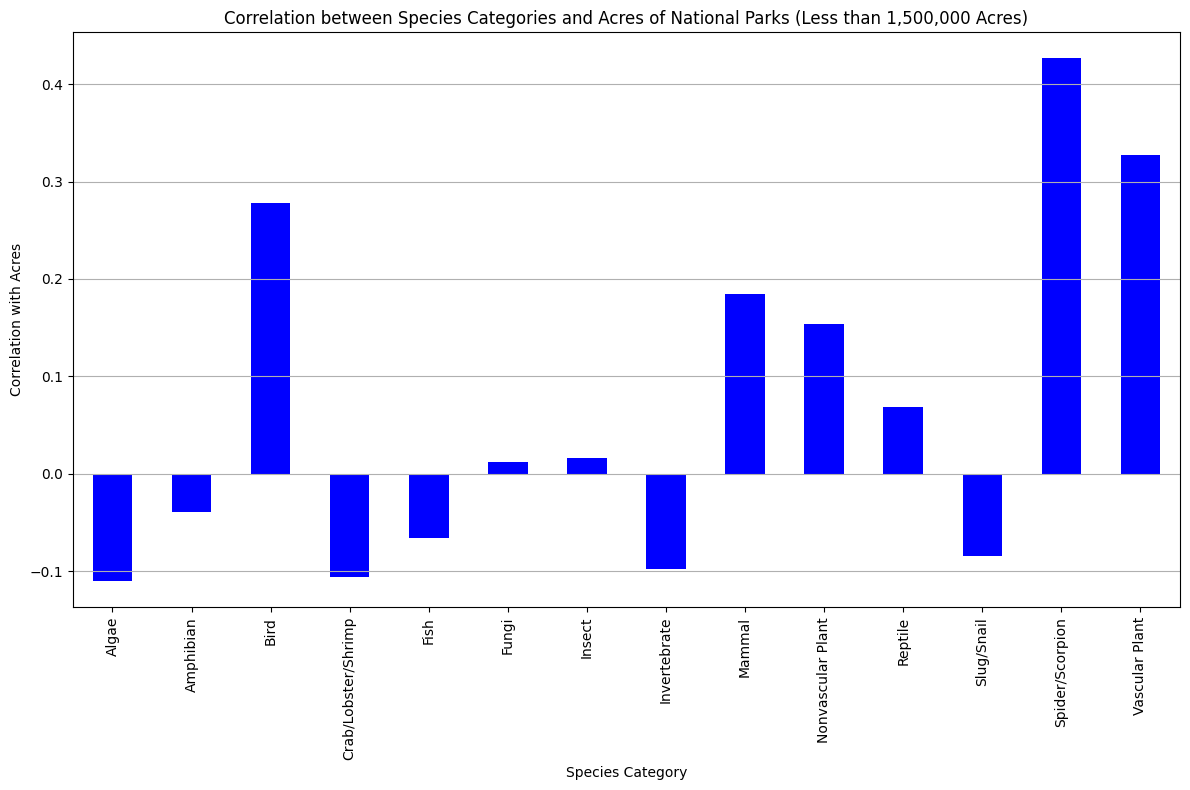

The species category with the highest correlation is 'Spider/Scorpion' with a correlation coefficient of 0.43.


In [ ]:
# Group the species data by 'Park Name' and count the unique 'Scientific Name' values for each park
species_counts = species_data.groupby(['Park Name', 'Category'])['Scientific Name'].nunique().reset_index()

# Pivot the table to have species categories as columns
pivoted_data = species_counts.pivot(index='Park Name', columns='Category', values='Scientific Name').fillna(0)

# Merge the species counts with the parks data on the 'Park Name' column
merged_data = pd.merge(parks_data, pivoted_data, on='Park Name')

# Filter the data to include only parks with less than 1,500,000 acres
filtered_data = merged_data[merged_data['Acres'] < 1500000]

# Drop latitude and longitude columns
filtered_data = filtered_data.drop(['Latitude', 'Longitude'], axis=1)

# Calculate the correlation between each species category and acres
correlations = filtered_data.corr().loc['Acres'].drop('Acres')

# Create a bar plot to visualize the correlations
plt.figure(figsize=(12, 8))
correlations.plot(kind='bar', color='b')
plt.title('Correlation between Species Categories and Acres of National Parks (Less than 1,500,000 Acres)')
plt.xlabel('Species Category')
plt.ylabel('Correlation with Acres')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Find the species category with the highest correlation
max_correlation = correlations.max()
max_category = correlations.idxmax()

print(f"The species category with the highest correlation is '{max_category}' with a correlation coefficient of {max_correlation:.2f}.")

The resulting visualization reveals the levels of correlation between the size of the national park and the diversity of animal species across all parks. The graph shows that bird, mammal, reptile, spider/scorpion, and plant species show a positive correlation with park size.


#Model 3:
This code provides an analysis of species counts in national parks, with a focus on five of the categories with high correlation coefficients: Insects, Fish, Birds, Mammals, and Vascular Plants. It merges the data from the two datasets and then graphs a scatter plot for visualization. The plot aims to illustrate the relationship between the size of the parks and the number of species in each category.

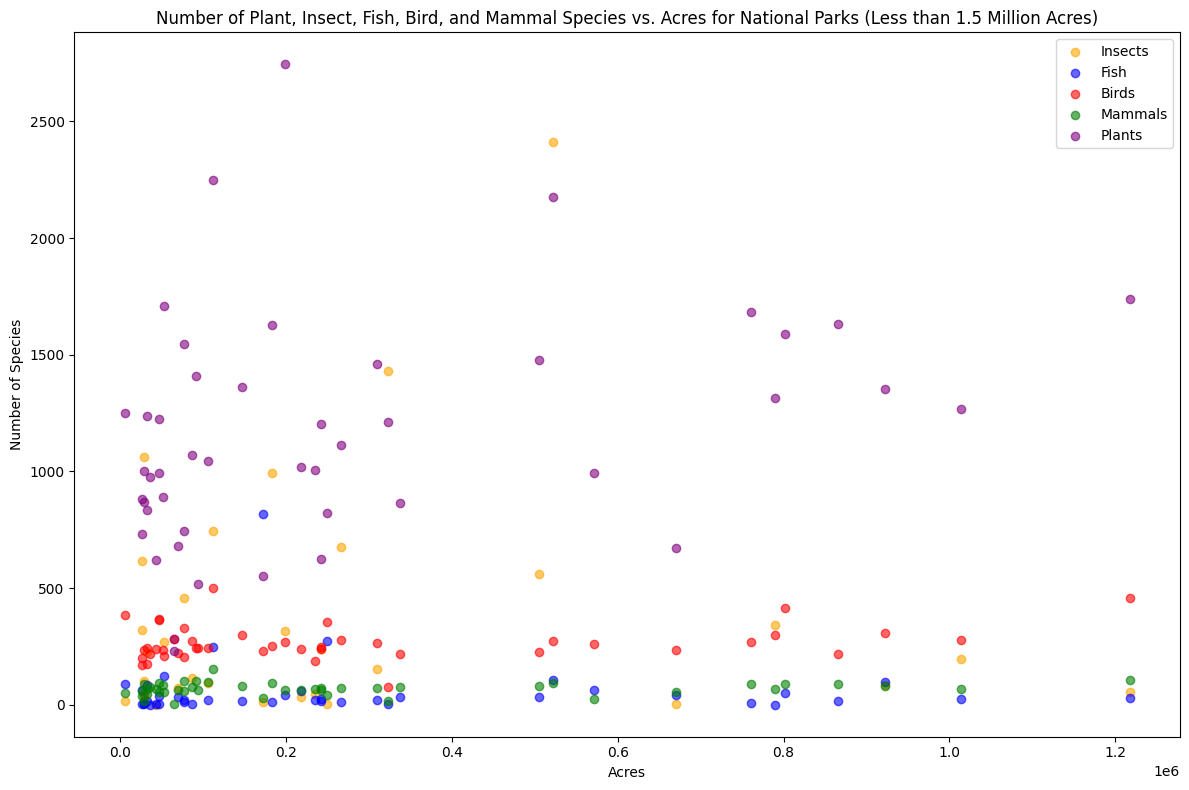

In [ ]:
# Filter and count for each category
insect_counts = species_data[species_data['Category'] == 'Insect'].groupby('Park Name')['Scientific Name'].nunique().reset_index(name='Insect Count')
fish_counts = species_data[species_data['Category'] == 'Fish'].groupby('Park Name')['Scientific Name'].nunique().reset_index(name='Fish Count')
bird_counts = species_data[species_data['Category'] == 'Bird'].groupby('Park Name')['Scientific Name'].nunique().reset_index(name='Bird Count')
mammal_counts = species_data[species_data['Category'] == 'Mammal'].groupby('Park Name')['Scientific Name'].nunique().reset_index(name='Mammal Count')
plant_counts = species_data[species_data['Category'] == 'Vascular Plant'].groupby('Park Name')['Scientific Name'].nunique().reset_index(name='Vascular Plant Count')

# Filter parks data
parks_data_filtered = parks_data[parks_data['Acres'] < 1500000]

# Merge the counts with the parks data
merged_data = pd.merge(parks_data_filtered, insect_counts, on='Park Name', how='left')
merged_data = pd.merge(merged_data, fish_counts, on='Park Name', how='left')
merged_data = pd.merge(merged_data, bird_counts, on='Park Name', how='left')
merged_data = pd.merge(merged_data, mammal_counts, on='Park Name', how='left')
merged_data = pd.merge(merged_data, plant_counts, on='Park Name', how='left')

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Acres'], merged_data['Insect Count'], c='orange', alpha=0.6, label='Insects')
plt.scatter(merged_data['Acres'], merged_data['Fish Count'], c='blue', alpha=0.6, label='Fish')
plt.scatter(merged_data['Acres'], merged_data['Bird Count'], c='red', alpha=0.6, label='Birds')
plt.scatter(merged_data['Acres'], merged_data['Mammal Count'], c='green', alpha=0.6, label='Mammals')  # Changed color for distinction
plt.scatter(merged_data['Acres'], merged_data['Vascular Plant Count'], c='purple', alpha=0.6, label='Plants')

plt.title('Number of Plant, Insect, Fish, Bird, and Mammal Species vs. Acres for National Parks (Less than 1.5 Million Acres)')
plt.xlabel('Acres')
plt.ylabel('Number of Species')
plt.legend()

plt.tight_layout()
plt.show()


The chart produced enables a visual comparison across different species categories and park sizes, revealing patterns or correlations between park size and biodiversity. The most clear correlation is seen in vasular plants, fish, birds, and mammals. However, a concrete conclusion cannot be drawn between park size and species diversity from simply this information. However, it can also be observed that the number of species per category (especially mammal, bird, and fish species) correlatates positively with the amount of vascular plant species.

#Model 4:
The scatter plot created by the code provides a visual analysis of the relationship between the number of vascular plant species and the numbers of mammal, bird, and fish species in national parks with less than 1.5 million acres.

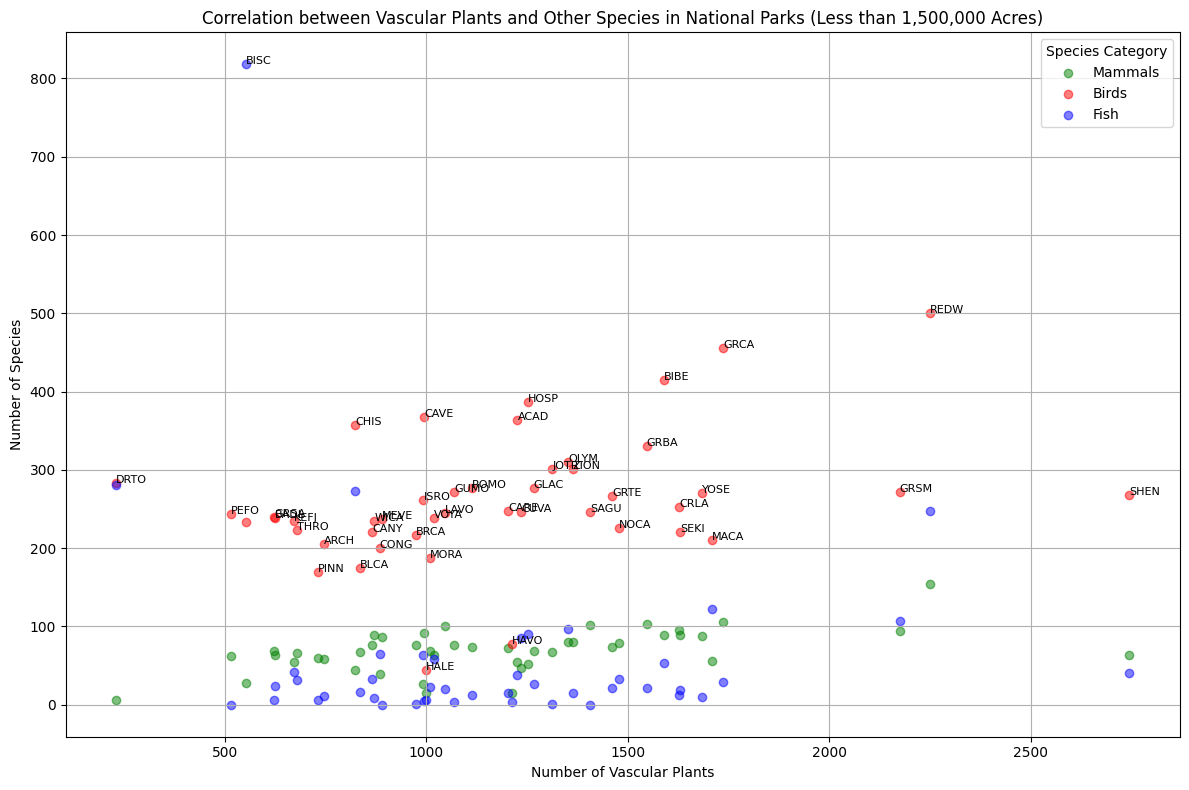

In [ ]:
# Group the species data by 'Park Name' and 'Category' and count unique 'Scientific Name' values
species_counts = species_data.groupby(['Park Name', 'Category'])['Scientific Name'].nunique().reset_index()

# Pivot the table to have species categories as columns
pivoted_data = species_counts.pivot(index='Park Name', columns='Category', values='Scientific Name').fillna(0)

# Merge the species counts with the parks data on the 'Park Name' column
merged_data = pd.merge(parks_data, pivoted_data, on='Park Name')

# Filter the data to include only parks with less than 1,500,000 acres
filtered_data = merged_data[merged_data['Acres'] < 1500000]

# Create a scatter plot to visualize the correlation between plant species and various animal species
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['Vascular Plant'], filtered_data['Mammal'], color='g', alpha=0.5, label='Mammals')
plt.scatter(filtered_data['Vascular Plant'], filtered_data['Bird'], color='r', alpha=0.5, label='Birds')
plt.scatter(filtered_data['Vascular Plant'], filtered_data['Fish'], color='b', alpha=0.5, label='Fish')
#plt.scatter(filtered_data['Vascular Plant'], filtered_data['Insect'], color='y', alpha=0.5, label='Insects')

plt.title('Correlation between Vascular Plants and Other Species in National Parks (Less than 1,500,000 Acres)')
plt.xlabel('Number of Vascular Plants')
plt.ylabel('Number of Species')
plt.grid(True)

# Add a legend
plt.legend(title='Species Category')

# Annotate each point with the park name
for i, row in filtered_data.iterrows():
    plt.annotate(row['Park Code'], (row['Vascular Plant'], max(row['Mammal'], row['Bird'], row['Fish'])), fontsize=8)

plt.tight_layout()
plt.show()


A positive correlation between the abundance of plant life and animal species diversity can be seen from this visual. Across all three species plotted (mammals, birds, and fish), there is a pattern between the number of vascular plants and the number of species in their respective category. The results speak to how a higher variety of plant life correlates with a higher variety of other species in the park. This is important to know in going forward with creating classification models.



---


#Data Exploration: Classification Results:

### Class Attribute Information
In my code, I am predicting the 'Mammal' count based on other species counts ('Vascular Plant', 'Bird', 'Insect', 'Fish'). For my classification task, I created a model to predict the categorical class of mammal counts in a park. This attribute is derived from the continuous 'Mammal' count data and categorized into three distinct classes: 'low', 'medium', and 'high'.
- 'low' is defined as a mammal count of less than 50.
- 'medium' encompasses counts from 50 to less than 80.
- 'high' is assigned to counts of 80 and above.

### Prediction Hypothesis
It is hypothesized that larger national parks support a greater variety of species due to more extensive habitats and resources. Additionally, the presence of various species positively influences the presence of others.

### Performance Comparison
For predicting the continuous value of mammals in a park, my kNN model predicted the following results:
- Mean Squared Error (MSE): 479.18
- R-squared (R2): 0.40

My Decision Tree model predicted the following results for the same task:
- Mean Squared Error: 145.9
- R² Score: 0.7358606705771598

Since decision trees can capture more complex, non-linear relationships between features and target variables. The relationship between the features ('Vascular Plant', 'Bird', 'Insect', 'Fish') and the target variable ('Mammal') is complex and non-linear at points, so therefore the decision tree performs better at predicting accurate results.

For my classification task, I used a decision tree knowing it would yeild better results with the complex dataset. I used Precision, Recall, and F1-Score measures to evaluate how well my model performed. Precsion measures how many instances predicted as that class are correct. Recall measures how often the model correctly identifies all instances in the class. The F1-Score is a measurement of balance between precision and recall. The following measurements yeild to moderate accuracy for the model.

'High' class:
- Precision: 0.60
- Recall: 0.75
- F1-score: 0.67

'Low' class
- Precision: 1.00
- Recall: 1.00
- F1-score: 1.00

'Medium' class
- Precision: 0.67
- Recall: 0.5
- F1-score: 0.57

I also used Macro and Weighted Averages to evaluate the performance of the entire model across classes. Macro Average does not account for label imbalance; it treats all classes equally, averaging the performance for each class. Weighted Average takes label imbalance into account. The averages align with the overall accuracy, indicating moderate performance.

- Macro average: 0.75
- Weighted average: 0.70


### Classification Challenges
I faced many challenged in classifying the data. Due to the natural variety of species across different parks in different ecosystems, my data was imbalanced. Imbalanced data can skew the performance of classifiers, leading to a bias towards majority classes. Additionally, I found it challenging selecting the appropriate species that would influence the presence of Mammals across different environments. Figuring out which species and data was relevant was improtant in that excessive features can diminish accuracy. Finding a balance between overfitting and underfitting the data was another key challenge. Overfitting, where a model learns the training data too well, including noise and outliers, resulting in poor performance on new data. Conversely, underfitting occurs when a model is too simplistic to capture the underlying trends. Choosing the most accurate parameters for my models took time and patience. Finally, since biodiversity is dependent on so many factors that were not included in my dataset, it is challenging to create a simplified model that is dependent on only the size of the park and presence of other species. Though these factors play a significant role, having more attributes included such as climate, average temperature, resources, visitation statistics, etc. would help the model yeild more accurate results.


---



# Models
#Model 5
This code creates a K-nearest neighbor model to predict mammal count from vascular plant, bird, insect, and fish count. It prints a graph with the predicted and actual mammal counts. It also calculates the Mean Squared Error (MSE) and R-squared (R2) values to test the accuracy of the model.


Mean Squared Error (MSE): 479.18
R-squared (R2): 0.40


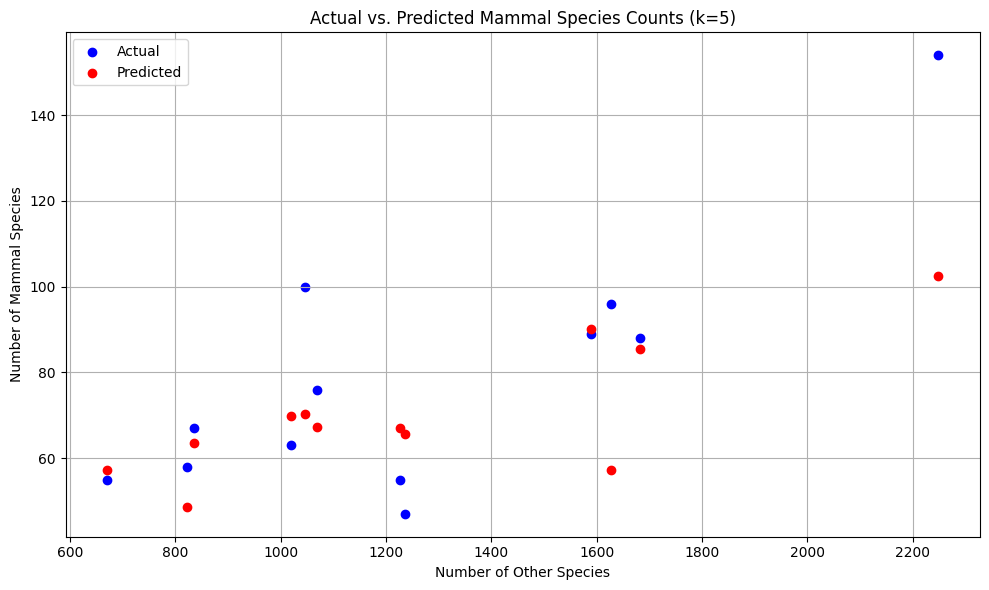

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
data = pd.read_csv('SpeciesCounts.csv')

# Define the features (X) and target variable (y)
X = data[['Vascular Plant', 'Bird', 'Insect', 'Fish']]
y = data['Mammal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the kNN regressor with k=3
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Predict mammal species counts based on the selected features for the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the actual vs. predicted values (using one feature for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Vascular Plant'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Vascular Plant'], y_pred, color='red', label='Predicted')
plt.title(f'Actual vs. Predicted Mammal Species Counts (k={k})')
plt.xlabel('Number of Other Species')
plt.ylabel('Number of Mammal Species')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

For predicting the value of mammals in a park, my kNN model predicted a MSE value of 479.18 and an R2 value of 0.40. These are moderately accurate results but another model likely will lead more accurate results because of the complexity of the data. This model does speak to a connect between park size and the presence of other species in predicting mammal species diversity.



#Model 6 and 7
This code creates a Decision Tree model to predict mammal count from vascular plant, bird, insect, and fish count. It prints out two graphs with the predicted and actual mammal counts to visualize the results. It also calculates the Mean Squared Error (MSE) and R-squared (R2) values to test the accuracy of the model.


Mean Squared Error: 145.9
R² Score: 0.7358606705771598


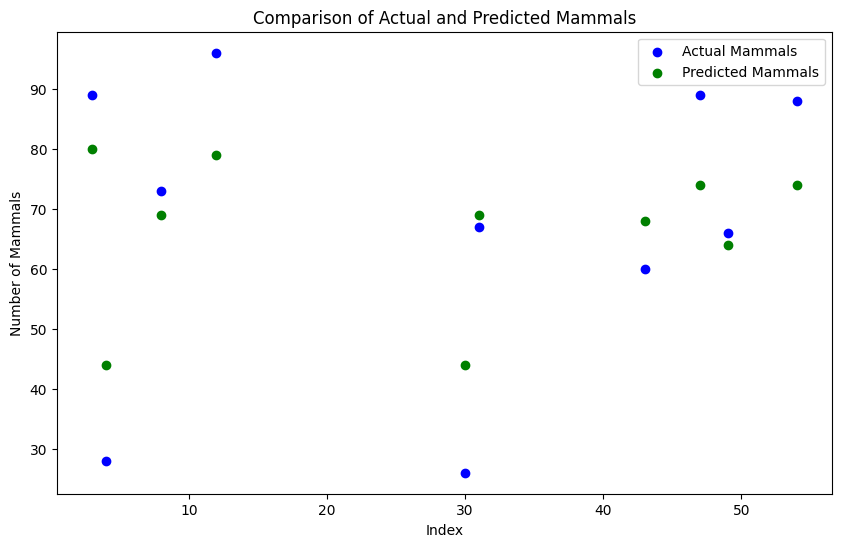

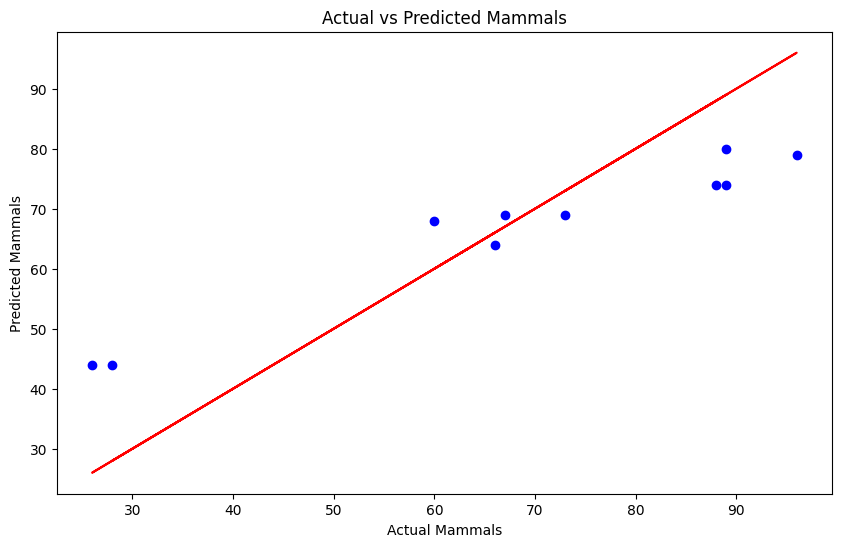

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define the features and target
X = filtered_data[['Acres','Vascular Plant','Insect', 'Fish', 'Bird']]  # Feature: Park size in acres
y = filtered_data['Mammal']  # Target: Number of mammals

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plotting the actual vs predicted values with different colors
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Mammals')  # Actual values in blue
plt.scatter(y_test.index, y_pred, color='green', label='Predicted Mammals')  # Predicted values in green
plt.xlabel('Index')
plt.ylabel('Number of Mammals')
plt.title('Comparison of Actual and Predicted Mammals')
plt.legend()
plt.show()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Mammals')
plt.ylabel('Predicted Mammals')
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Mammals')
plt.show()


For predicting the value of mammals in a park, my Decision Tree model predicted a MSE value of 145.9 and an R2 value of 0.73. These are more accurate results than my kNN model as it can predict the amount of different mammal species within 12 species on average. This model directly shows a connection between park size and the presence of other species in predicting mammal species diversity.


#Model 8
This code creates another Decision Tree model to classify mammals based on three categories and predict species count based on acres, vascular plant, insect, fish, and bird count. It then uses the training data to predict if a park with similar attributes will have a low, medium, or high number of different mammal species.

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

        high       0.60      0.75      0.67         4
         low       1.00      1.00      1.00         2
      medium       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.76      0.75      0.75        10
weighted avg       0.71      0.70      0.70        10



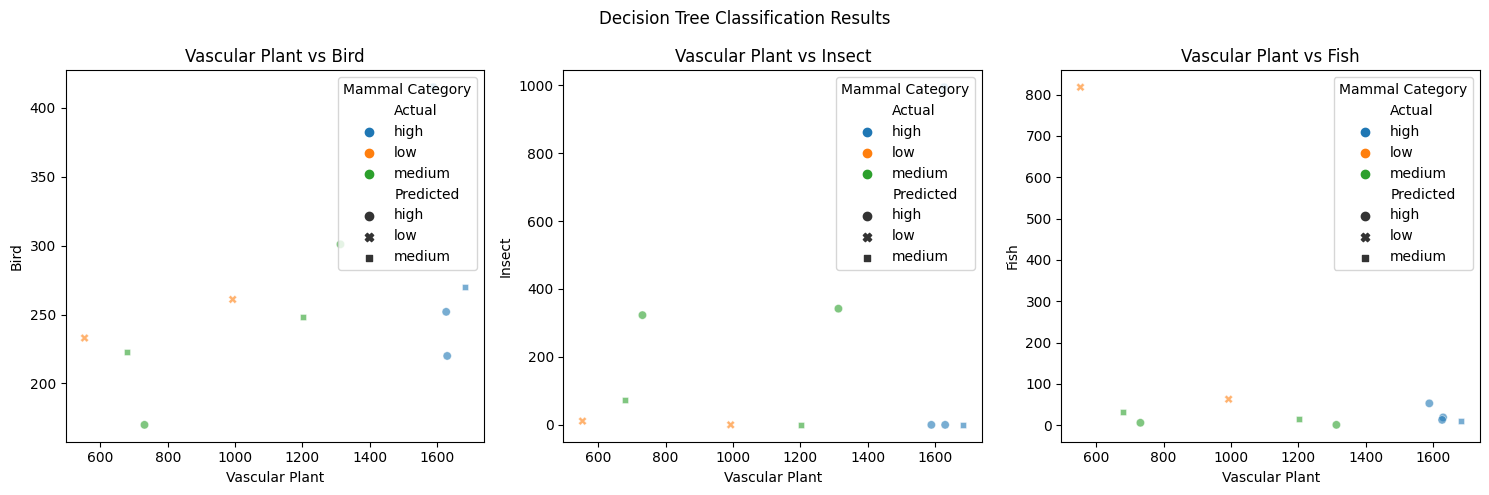

Distribution of Class Labels:
medium    50.000000
high      32.608696
low       17.391304
Name: Mammal, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Define the features (X) and target variable (y)
X = filtered_data[['Vascular Plant', 'Bird', 'Insect', 'Fish']]

# Transform the 'Mammal' count into categories
def categorize_mammals(count):
    if count < 50:
        return 'low'
    elif 50 <= count < 80:
        return 'medium'
    else:
        return 'high'

y = filtered_data['Mammal'].apply(categorize_mammals)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Classifier model
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the performance metrics
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Create a DataFrame from X_test and add actual and predicted labels
test_data = X_test.copy()
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred

# Define the feature pairs to plot
feature_pairs = [('Vascular Plant', 'Bird'), ('Vascular Plant', 'Insect'), ('Vascular Plant', 'Fish')]

# Plot each pair in a subplot
plt.figure(figsize=(15, 5))
for i, pair in enumerate(feature_pairs, 1):
    plt.subplot(1, len(feature_pairs), i)
    sns.scatterplot(data=test_data, x=pair[0], y=pair[1], hue='Actual', style='Predicted', alpha=0.6)
    plt.title(f'{pair[0]} vs {pair[1]}')
    plt.legend(title='Mammal Category', loc='upper right')

plt.suptitle('Decision Tree Classification Results')
plt.tight_layout()
plt.show()

label_distribution = y.value_counts(normalize=True) * 100

# Print the distribution
print("Distribution of Class Labels:")
print(label_distribution)


For predicting the continuous value of mammals in a park, my Decision Tree model predicted a 70% accuracy level and macro and weighted averages between 70 and 80%. The accuracy measurements (precision, recall, and f1-score) yeild to moderate accuracy for the model and the averages align with the overall accuracy, indicating moderate performance.



---


#Conclusion
###Dataset Summary
In this project, I utilized two CSV datasets to explore biodiversity in national parks. The Species Table, with 119,249 instances, provided detailed information on various species, including their scientific and common names, categories, and the parks they inhabit. The Park Information Table contained data on 57 national parks, including their size (acres), location, and unique codes. These datasets allowed for a comprehensive analysis of the relationship between park size and species diversity.

###Classification Approach
The project's primary classification objective was to classify the biodiversity of mammal species based on the size of the national parks and the number of other species present. For this, two models were developed: kNN and Decision Tree. The kNN model, used for regression, showed moderate performance with an MSE of 479.18 and an R2 of 0.40. The Decision Tree model, more adept at handling the dataset's complexity, demonstrated better performance with an MSE of 145.9 and an R² Score of 0.736. For classification, a Decision Tree Classifier was employed to categorize mammal counts ('low', 'medium', 'high') based on counts of other species. It achieved moderate accuracy, with precision, recall, and F1-scores indicating a balanced performance across classes. Future improvements could include more nuanced feature selection, parameter optimization, and expanding the dataset to encompass additional ecological factors.

###Future Impacts:
The insights from this project have significant implications for stakeholders like environmental researchers, conservationists, and policy makers. By understanding the correlation between park size and biodiversity, more informed decisions can be made regarding conservation strategies and park management. This could lead to better preservation of ecosystems and more effective species protection measures. Ethically, this project highlights the importance of utilizing data and responsible interpretation for matters of environmental decision-making. This ensures that conservation efforts are based on accurate, comprehensive analyses that consider the complexity of various ecological factors.


---




